In [6]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data reading and pre processing

In [7]:
data = pd.DataFrame(pd.read_csv("../input/creditcard.csv"))

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

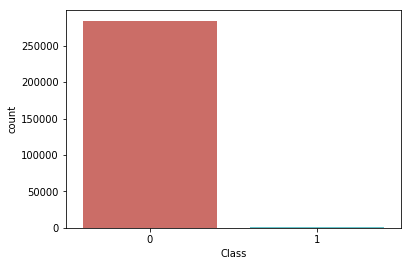

In [9]:
sns.countplot(x = 'Class', data = data, palette = 'hls')
plt.show()

In [10]:
# Checking correlation of the features for dimensionality reduction
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [11]:
TargetVariable = data['Class']
Data = data.drop(['Class'],axis = 1)

In [12]:
from sklearn.cross_validation import train_test_split
TrainData, TestData , TrainVariable, TestVariable = train_test_split(Data,TargetVariable,test_size = 0.3)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Training Begins

In [13]:
HLNeurons = len(TrainData.columns)
BatchSize = len(TrainData)

In [14]:
DataIn = tf.placeholder(tf.float64,[None,HLNeurons]) 
LabelTF = tf.placeholder(tf.float64,[None,1])

In [15]:
# Using hyperbolic tan as our activation function
HL1Thetas = tf.Variable(np.random.randn(HLNeurons,HLNeurons))
HL1Out = tf.tanh(tf.matmul(DataIn,HL1Thetas))
HL2Thetas = tf.Variable(np.random.randn(HLNeurons,HLNeurons))
HL2Out = tf.tanh(tf.matmul(HL1Out,HL2Thetas))
HL3Thetas = tf.Variable(np.random.randn(HLNeurons,HLNeurons))
HL3Out = tf.tanh(tf.matmul(HL2Out,HL3Thetas))
HL4Thetas = tf.Variable(np.random.randn(HLNeurons,HLNeurons))
HL4Out = tf.tanh(tf.matmul(HL3Out,HL4Thetas))
OtptThetas = tf.Variable(np.random.randn(HLNeurons,2))
Otpt = tf.tanh(tf.matmul(HL4Out,OtptThetas))

In [16]:
CostFunctionError = tf.reduce_mean(tf.square(Otpt-LabelTF))
Optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0005)

In [17]:
MinimizeError = Optimizer.minimize(CostFunctionError)

In [18]:
Init = tf.global_variables_initializer()

In [19]:
with tf.Session() as S:
    Epochs = 1000
    S.run(Init)
    error = []
    iterations = []
    for i in range(0,Epochs):
        RandomIndice = np.random.randint(0,len(TrainData),size = BatchSize)
        Data2Feed = {DataIn: np.array(TrainData.iloc[RandomIndice]),
                    LabelTF:np.array(TrainVariable.iloc[RandomIndice]).reshape(BatchSize,1)}
        S.run(MinimizeError,feed_dict=Data2Feed)
        CE = S.run([CostFunctionError],feed_dict = Data2Feed)
        
        print("Current EP Error,Current: ",CE,"Iter: ",i)
        
        error.append(CE)
        iterations.append(i)
        
    TrainedThetas = S.run([HL1Thetas,HL2Thetas,HL3Thetas,HL4Thetas,OtptThetas])



Current EP Error,Current:  [0.5537678684013557] Iter:  0
Current EP Error,Current:  [0.5407091675978705] Iter:  1
Current EP Error,Current:  [0.5311902343732036] Iter:  2
Current EP Error,Current:  [0.5249929118770956] Iter:  3
Current EP Error,Current:  [0.5203615907921744] Iter:  4
Current EP Error,Current:  [0.5174099221803468] Iter:  5
Current EP Error,Current:  [0.5145908090787578] Iter:  6
Current EP Error,Current:  [0.5129277031216539] Iter:  7
Current EP Error,Current:  [0.5115778745500144] Iter:  8
Current EP Error,Current:  [0.5106438457928189] Iter:  9
Current EP Error,Current:  [0.5093106852674877] Iter:  10
Current EP Error,Current:  [0.5087405941352563] Iter:  11
Current EP Error,Current:  [0.5081661129194824] Iter:  12
Current EP Error,Current:  [0.5076708106697284] Iter:  13
Current EP Error,Current:  [0.5068293342864721] Iter:  14
Current EP Error,Current:  [0.5069877243000223] Iter:  15
Current EP Error,Current:  [0.5067459568839163] Iter:  16
Current EP Error,Current

Current EP Error,Current:  [0.5054361544370836] Iter:  142
Current EP Error,Current:  [0.5051118356296346] Iter:  143
Current EP Error,Current:  [0.5052150010833801] Iter:  144
Current EP Error,Current:  [0.5052492892022463] Iter:  145
Current EP Error,Current:  [0.505262359066292] Iter:  146
Current EP Error,Current:  [0.5051177473476989] Iter:  147
Current EP Error,Current:  [0.5049544697272066] Iter:  148
Current EP Error,Current:  [0.505665385013116] Iter:  149
Current EP Error,Current:  [0.5052768076533354] Iter:  150
Current EP Error,Current:  [0.5053041391697174] Iter:  151
Current EP Error,Current:  [0.5047898775064972] Iter:  152
Current EP Error,Current:  [0.5051515730841206] Iter:  153
Current EP Error,Current:  [0.5048973707996821] Iter:  154
Current EP Error,Current:  [0.5051753830834779] Iter:  155
Current EP Error,Current:  [0.5055984688516262] Iter:  156
Current EP Error,Current:  [0.5051958812282805] Iter:  157
Current EP Error,Current:  [0.5052575214433863] Iter:  158

Current EP Error,Current:  [0.5053111818999692] Iter:  282
Current EP Error,Current:  [0.5052333448579891] Iter:  283
Current EP Error,Current:  [0.505635468273695] Iter:  284
Current EP Error,Current:  [0.5053746931553232] Iter:  285
Current EP Error,Current:  [0.5054572842932857] Iter:  286
Current EP Error,Current:  [0.5053565291803392] Iter:  287
Current EP Error,Current:  [0.5052248846307503] Iter:  288
Current EP Error,Current:  [0.504826390051609] Iter:  289
Current EP Error,Current:  [0.5050870048537371] Iter:  290
Current EP Error,Current:  [0.5053687330729739] Iter:  291
Current EP Error,Current:  [0.5051015501815516] Iter:  292
Current EP Error,Current:  [0.5051202447660766] Iter:  293
Current EP Error,Current:  [0.5052093619973175] Iter:  294
Current EP Error,Current:  [0.5050619601221844] Iter:  295
Current EP Error,Current:  [0.5054963053465065] Iter:  296
Current EP Error,Current:  [0.505311553141374] Iter:  297
Current EP Error,Current:  [0.5054542955308234] Iter:  298


Current EP Error,Current:  [0.505433969212805] Iter:  422
Current EP Error,Current:  [0.5051724810980678] Iter:  423
Current EP Error,Current:  [0.5054242346644546] Iter:  424
Current EP Error,Current:  [0.5049620738426748] Iter:  425
Current EP Error,Current:  [0.5055006323436941] Iter:  426
Current EP Error,Current:  [0.5050648881966658] Iter:  427
Current EP Error,Current:  [0.505232789698179] Iter:  428
Current EP Error,Current:  [0.505037005882377] Iter:  429
Current EP Error,Current:  [0.5052058566214747] Iter:  430
Current EP Error,Current:  [0.5054857858692163] Iter:  431
Current EP Error,Current:  [0.5057735989594286] Iter:  432
Current EP Error,Current:  [0.5052042425263062] Iter:  433
Current EP Error,Current:  [0.5051367982819018] Iter:  434
Current EP Error,Current:  [0.5051491989978595] Iter:  435
Current EP Error,Current:  [0.5051930813277806] Iter:  436
Current EP Error,Current:  [0.505096737362784] Iter:  437
Current EP Error,Current:  [0.5052343489981515] Iter:  438
C

Current EP Error,Current:  [0.5053644638389378] Iter:  562
Current EP Error,Current:  [0.5053671956020686] Iter:  563
Current EP Error,Current:  [0.5051500765543281] Iter:  564
Current EP Error,Current:  [0.5049934513205788] Iter:  565
Current EP Error,Current:  [0.5050885833380818] Iter:  566
Current EP Error,Current:  [0.5049292761760653] Iter:  567
Current EP Error,Current:  [0.5051390503168458] Iter:  568
Current EP Error,Current:  [0.5046777570155683] Iter:  569
Current EP Error,Current:  [0.5051150788386933] Iter:  570
Current EP Error,Current:  [0.505445441553297] Iter:  571
Current EP Error,Current:  [0.5052753115847184] Iter:  572
Current EP Error,Current:  [0.5053042391729168] Iter:  573
Current EP Error,Current:  [0.505112629136819] Iter:  574
Current EP Error,Current:  [0.5053917661321397] Iter:  575
Current EP Error,Current:  [0.5048850422208931] Iter:  576
Current EP Error,Current:  [0.5051519138739174] Iter:  577
Current EP Error,Current:  [0.5048285887162792] Iter:  578

Current EP Error,Current:  [0.5050937349268495] Iter:  702
Current EP Error,Current:  [0.5047734065414349] Iter:  703
Current EP Error,Current:  [0.504916006288361] Iter:  704
Current EP Error,Current:  [0.5050166332763649] Iter:  705
Current EP Error,Current:  [0.5051918636803524] Iter:  706
Current EP Error,Current:  [0.5051276006295643] Iter:  707
Current EP Error,Current:  [0.5050971730863084] Iter:  708
Current EP Error,Current:  [0.5055155651966811] Iter:  709
Current EP Error,Current:  [0.5050069519707503] Iter:  710
Current EP Error,Current:  [0.5051971620252114] Iter:  711
Current EP Error,Current:  [0.5052674607910697] Iter:  712
Current EP Error,Current:  [0.505075384619975] Iter:  713
Current EP Error,Current:  [0.5052019029400865] Iter:  714
Current EP Error,Current:  [0.5049073245485908] Iter:  715
Current EP Error,Current:  [0.5051875946745351] Iter:  716
Current EP Error,Current:  [0.5052725987130254] Iter:  717
Current EP Error,Current:  [0.5046947528602804] Iter:  718

Current EP Error,Current:  [0.5050683068935068] Iter:  842
Current EP Error,Current:  [0.5055137227202515] Iter:  843
Current EP Error,Current:  [0.5051545060026971] Iter:  844
Current EP Error,Current:  [0.5051362360782341] Iter:  845
Current EP Error,Current:  [0.5050907542906133] Iter:  846
Current EP Error,Current:  [0.5049918985542432] Iter:  847
Current EP Error,Current:  [0.5051430261751332] Iter:  848
Current EP Error,Current:  [0.5054964616592483] Iter:  849
Current EP Error,Current:  [0.5052383993535992] Iter:  850
Current EP Error,Current:  [0.5049846552462535] Iter:  851
Current EP Error,Current:  [0.5052313269937387] Iter:  852
Current EP Error,Current:  [0.505269876207655] Iter:  853
Current EP Error,Current:  [0.5054852541900032] Iter:  854
Current EP Error,Current:  [0.5050917841849072] Iter:  855
Current EP Error,Current:  [0.504924703080422] Iter:  856
Current EP Error,Current:  [0.5052073313806071] Iter:  857
Current EP Error,Current:  [0.505213029228332] Iter:  858


Current EP Error,Current:  [0.5049484802549468] Iter:  982
Current EP Error,Current:  [0.505200557326663] Iter:  983
Current EP Error,Current:  [0.5050560789315248] Iter:  984
Current EP Error,Current:  [0.5052156835965276] Iter:  985
Current EP Error,Current:  [0.5049437217523289] Iter:  986
Current EP Error,Current:  [0.504878020722178] Iter:  987
Current EP Error,Current:  [0.5049648160861274] Iter:  988
Current EP Error,Current:  [0.5052281538986128] Iter:  989
Current EP Error,Current:  [0.5047388882382313] Iter:  990
Current EP Error,Current:  [0.5052869656715542] Iter:  991
Current EP Error,Current:  [0.5051875321140915] Iter:  992
Current EP Error,Current:  [0.5052095648264775] Iter:  993
Current EP Error,Current:  [0.505075899009225] Iter:  994
Current EP Error,Current:  [0.5049990728678243] Iter:  995
Current EP Error,Current:  [0.5053779725141802] Iter:  996
Current EP Error,Current:  [0.5052636706261604] Iter:  997
Current EP Error,Current:  [0.5051479666522688] Iter:  998


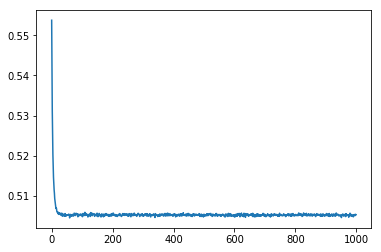

In [20]:
# Plotting and checking whether the gradient descent
plt.plot(iterations,error)
plt.show()

# Testing Begins

In [21]:
HL1Output = np.tanh(np.dot(TestData,TrainedThetas[0]))
HL2Output = np.tanh(np.dot(HL1Output,TrainedThetas[1]))
HL3Output = np.tanh(np.dot(HL2Output,TrainedThetas[2]))
HL4Output = np.tanh(np.dot(HL3Output, TrainedThetas[3]))
HL5Output = np.tanh(np.dot(HL4Output, TrainedThetas[4]))

In [22]:
print(HL5Output[0])

[-0.99994983  0.00164609]


In [23]:
NewOuts = []
for i in range(0,len(HL5Output)):
    if(HL5Output[i][1]>HL5Output[i][0]):
        NewOuts.append(0)
    else:
        NewOuts.append(1)

In [24]:
correct = 0
for i in range(0,len(TestVariable)):
    if(TestVariable.iloc[i] == NewOuts[i]):
        correct+=1
        

In [25]:
Accuracy = (correct/len(TestVariable))*100
print("=======================================")
print("Accuracy Score: ",Accuracy,"%")
print("=======================================")

Accuracy Score:  99.78816286881312 %
